# <center>Le troisième TD de morpho-math</center>

## Début: les environnements nécessaires

In [1]:
## pour avoir des figures "en ligne"
%matplotlib inline

In [2]:
## le minimum syndical
import matplotlib.pylab as plt
import numpy as np
from copy import deepcopy
import morphograph as mg
from morphograph import Graph

In [3]:
def changeAdjacency(graph,type='4'):
    '''
    Change l'adjacence d'un graphe
    '''
    nodes=graph.get_nodes() ## récupère les sommets
    W = graph.get_W()
    H = graph.get_H()
            
    edges = [] ## structure d'arêtes
    
    ## "4-connectivité"
    if (type == '4'):
        for y in range(0,H-1):
            for x in range(0,W-1):
                i = y * W + x
                edges.append([i,i+1,0]) # toutes les arêtes sont valuées à zéro 
                edges.append([i,i+W,0]) # pour le moment
        # arêtes de la fin
        for x in range(0,W-1):
            i = (H-1)*W + x
            edges.append([i,i+1,0])
        for y in range(0,H-1):
            i = y * W + (W-1)
            edges.append([i,i+W,0])
    
    ## "8-connectivité"
    if (type == '8'):
        for y in range(0,H-1):
            for x in range(1,W-1):
                i = y * W + x
                edges.append([i,i+1,0]) # toutes les arêtes sont valuées à zéro 
                edges.append([i,i+W,0]) # pour le moment
                edges.append([i,i+W+1,0]) # NW-SE
                edges.append([i,i+W-1,0]) # NE-SW
        # arêtes verticales début et fin
        for y in range(0,H-1):
            i = y * W + (W-1)
            edges.append([i,i+W,0])
            edges.append([i,i+W-1,0])
            i = y * W
            edges.append([i,i+1,0])
            edges.append([i,i+W+1,0])
            edges.append([i,i+W,0])
        # arête horizontales fin
        for x in range(0,W-1):
            i = (H-1)*W + x
            edges.append([i,i+1,0])
        
    
    if (type == 'H'): ## horizontal adjacence
        for y in range(0,H-1):
            for x in range(0,W-1):
                i = y * W + x
                edges.append([i,i+1,0]) # arètes horizontales seulement
        # arêtes horizontales de la fin
        for x in range(0,W-1):
            i = (H-1)*W + x
            edges.append([i,i+1,0])

    if (type == 'V'): ## vertical adjacence
        for y in range(0,H-1):
            for x in range(0,W-1):
                i = y * W + x
                edges.append([i,i+W,0]) # arêtes verticales seulement
        # arêtes verticales de la fin
        for y in range(0,H-1):
            i = y * W + (W-1)
            edges.append([i,i+W,0])
            
    ### Definissez aussi les deux diagonales comme deux adjacences séparées.
    if (type == 'D1'):
        for y in range(0,H-1):
            for x in range(1,W-1):
                i = y * W + x
                edges.append([i,i+W+1,0]) # NW-SE
        # arêtes verticales début et fin
        for y in range(0,H-1):
            i = y * W
            edges.append([i,i+W+1,0])
            
        ## "8-connectivité"
    if (type == 'D2'):
        for y in range(0,H-1):
            for x in range(1,W-1):
                i = y * W + x
                edges.append([i,i+W-1,0]) # NE-SW
        # arêtes verticales début et fin
        for y in range(0,H-1):
            i = y * W + (W-1)
            edges.append([i,i+W-1,0])


    
    return(Graph(edges,nodes,W,H))

## Vérification des adjacences

Graphe de dimension (11 x 11)


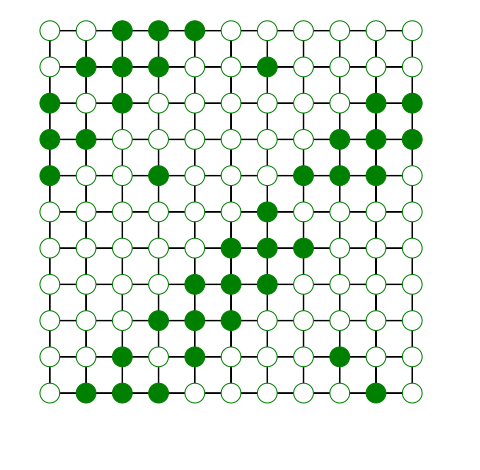

In [4]:
Bands=mg.read_graph("images/bands.txt")
Bands.display()

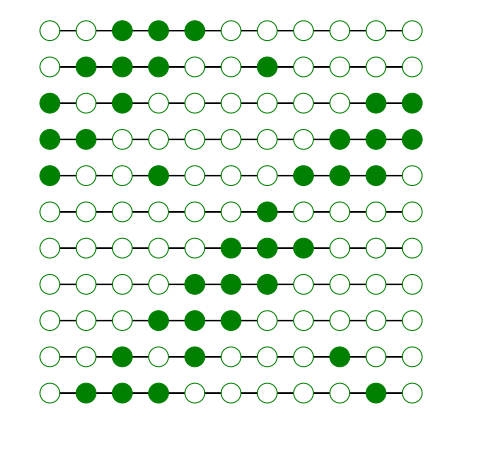

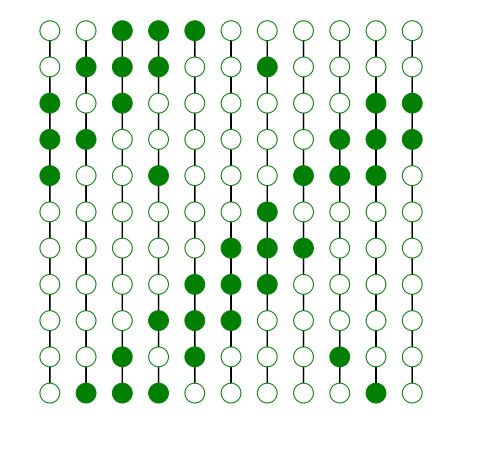

In [5]:
BandsH = changeAdjacency(Bands,"H")
BandsH.display()
BandsV = changeAdjacency(Bands,"V")
BandsV.display()

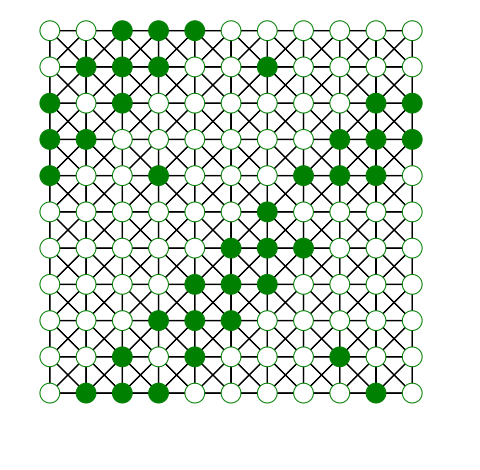

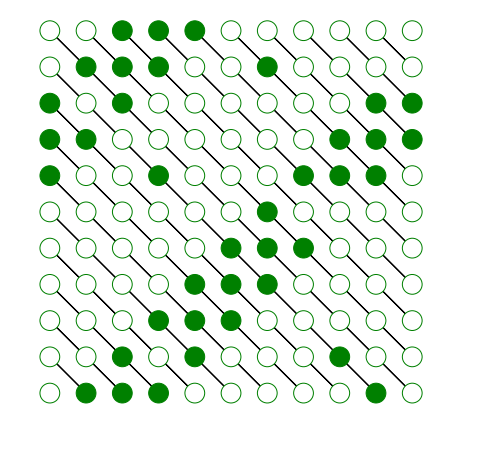

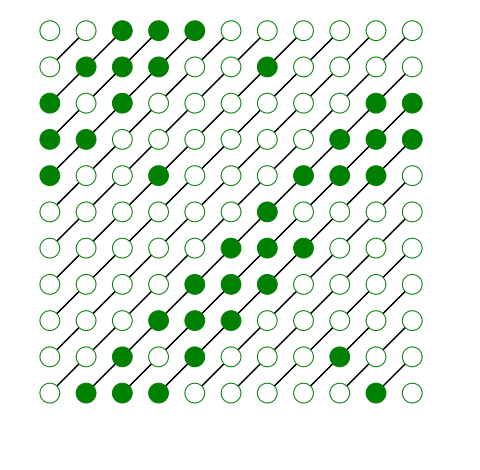

In [6]:
Bands8 = changeAdjacency(Bands,"8")
Bands8.display()
plt.show()

BandsD1 = changeAdjacency(Bands,"D1")
BandsD1.display()
plt.show()

BandsD1 = changeAdjacency(Bands,"D2")
BandsD1.display()
plt.show()

# Exemple d'utilisation de la classe Graph

In [8]:
import importlib
import morphograph
importlib.reload(morphograph)
FP = mg.read_graph("images/FP.txt")

Graphe de dimension (128 x 95)


In [9]:
FPH = changeAdjacency(FP,"H")
FPcloH=mg.fermeture(FPH)
FPV = changeAdjacency(FP,"V")
FPcloV = mg.fermeture(FPV)
FPD1 = changeAdjacency(FP,"D1")
FPcloD1=mg.fermeture(FPD1)
FPD2 = changeAdjacency(FP,"D2")
FPcloD2=mg.fermeture(FPD2)

### Using 4 different closings

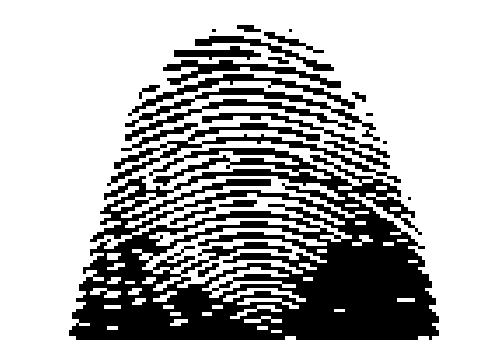

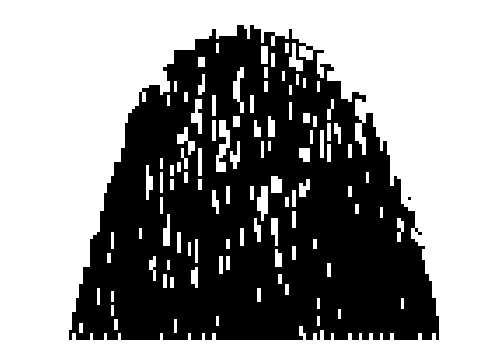

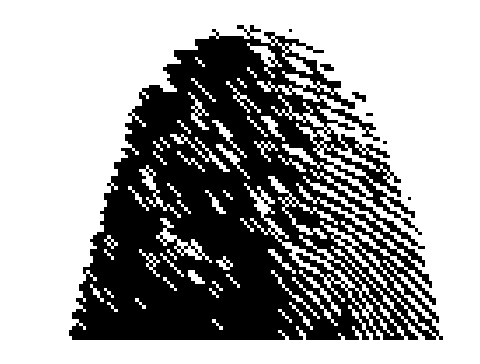

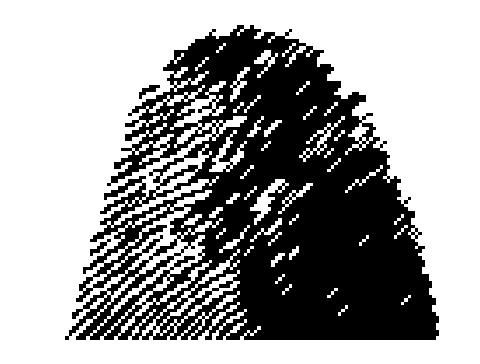

In [10]:
FPcloH.show(inv=True)
FPcloV.show(inv=True)
FPcloD1.show(inv=True)
FPcloD2.show(inv=True)

### compute the inf between two images

In [11]:
## this assumes the data is in the same order for both images
def applyDualNodeOperator(g1,g2, dual_op_, verify=True):
    """
    applies a generic scalar Dual operator on the nodes of G1 and G2 and returns a new graph
    
    applique un operateur sur les sommets de deux graphes G1 et G2 et produit un nouveau graphe
    
    """
    mynodes_out = deepcopy(g1.get_nodes())
    mynodes_in = g2.get_nodes() # read only, no need to copy
    W = g1.get_W()
    H = g1.get_H()
    if (not verify):
        for i in range(0,W*H):
            mynodes_out[i][2] = dual_op_(my_nodes_out[i][2],my_nodes_in[i][2])
    else:
        for i in range(0,g1.get_H()*g1.get_W()):
            if ((mynodes_out[i][0] == mynodes_in[i][0]) and (mynodes_out[i][1] == mynodes_in[i][1])): 
                mynodes_out[i][2] = dual_op_(mynodes_out[i][2],mynodes_in[i][2])
    return(Graph(g1.get_edges(), mynodes_out, W,H))   


def inf(g1, g2, verify=True):
    """
    Pointwise infimum
    
    Minimum point à point
    """
    return(applyDualNodeOperator(g1,g2,min, verify=verify))

def sup(g1, g2, verify=True):
    """
    Pointwise supremum
    
    maximum point à point
    """
    return(applyDualNodeOperator(g1,g2,max, verify=verify))

def sub_op(v1,v2):
    return(v1-v2)

def sub(g1,g2, verify=True):
    """
    Pointwise subtraction
    
    Soustraction point à point
    """
    return(applyDualNodeOperator(g1,g2,sub_op,verify=verify))


Graphe de dimension (128 x 95)


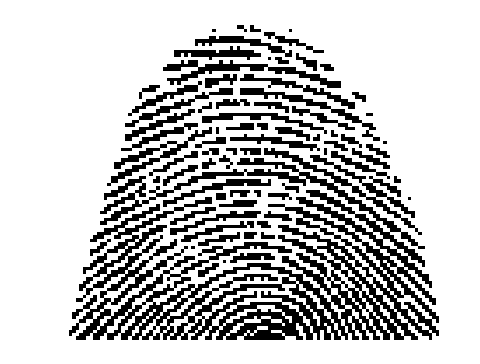

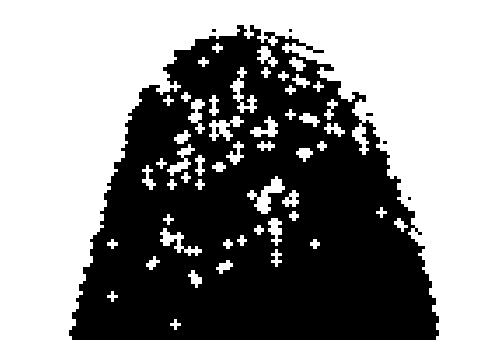

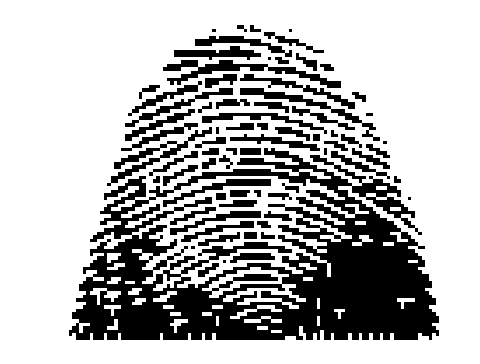

In [13]:
FP=mg.read_graph("images/FP.txt")

FP.show(inv=True)

FPclo4 = mg.fermeture(FP)
FPclo4.show(inv=True)

FPH = changeAdjacency(FP,"H")
FPcloH=mg.fermeture(FPH)
FPV = changeAdjacency(FP,"V")
FPcloV = mg.fermeture(FPV)

FPcloHV = inf(FPcloV,FPcloH)
FPcloHV.show(inv=True)

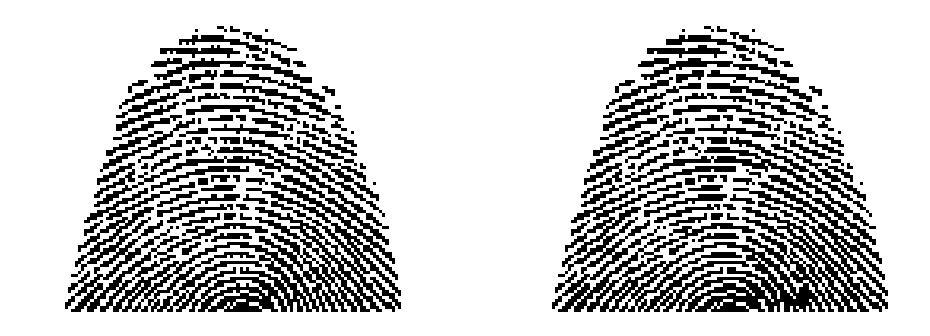

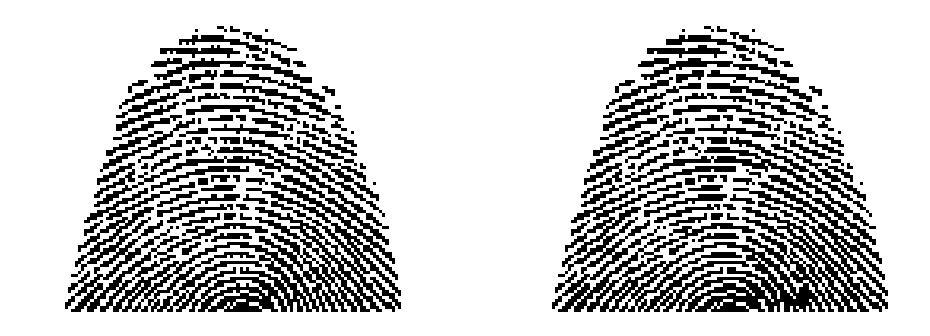

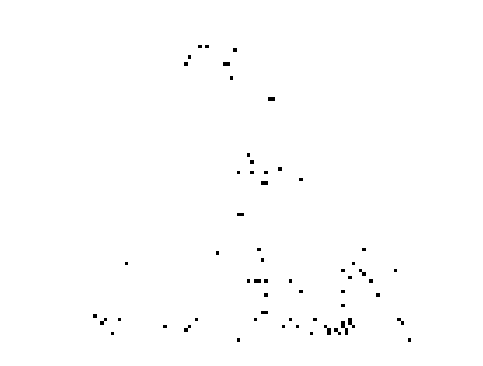

In [23]:
minVH = inf(FPcloH,FPcloV)
minD1D2 = inf(FPcloD1,FPcloD2)
minOrient = inf(minVH,minD1D2)

fig=plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(1,2,1)
ax1.axis('off')
ax1.imshow(FP.image(),cmap="gray_r")
ax2 = fig.add_subplot(1,2,2)
ax2.axis('off')
ax2.imshow(minOrient.image(),cmap="gray_r")

gdiff = sub(minOrient, FP)
gdiff.show(inv=True)

Graphe de dimension (128 x 95)


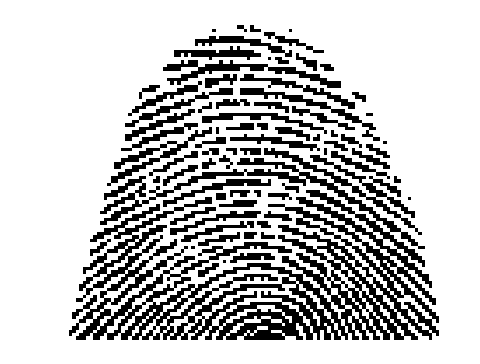

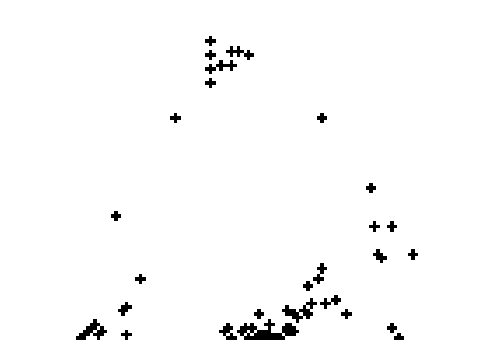

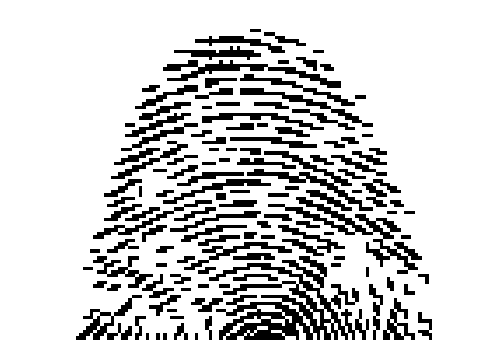

In [17]:
## Cas de l'ouverture

FP=mg.read_graph("images/FP.txt")
FP.show(inv=True)
FPopen4 = mg.ouverture(FP)
FPopen4.show(inv=True)

FPH = changeAdjacency(FP,"H")
FPopeH=mg.ouverture(FPH)
FPV = changeAdjacency(FP,"V")
FPopeV = mg.ouverture(FPV)

FPopeHV = sup(FPopeV,FPopeH)
FPopeHV.show(inv=True)

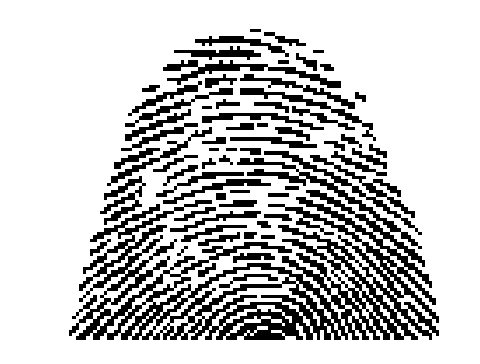

In [18]:
FPD1 = changeAdjacency(FP,"D1")
FPopeD1=mg.ouverture(FPD1)
FPD2 = changeAdjacency(FP,"D2")
FPopeD2 = mg.ouverture(FPD2)

FPopeHV = sup(FPopeV,FPopeH)
FPopeD = sup(FPopeD1,FPopeD2)
FPopeDir = sup(FPopeHV,FPopeD)
FPopeDir.show(inv=True)

In [115]:
dat=gdiff.image()
dat.max()

255

In [136]:
FPHclo=erode(FPHdil)

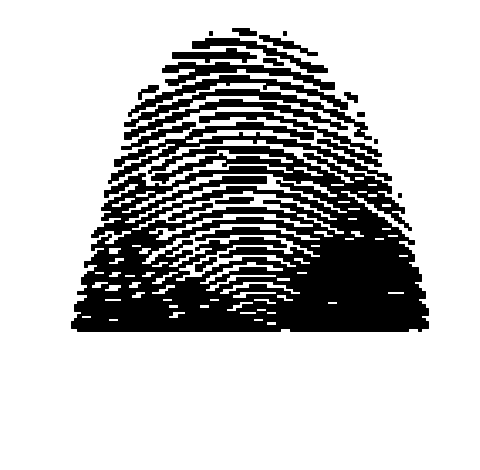

In [137]:
FPHclo.show(inv=True)

## Operateurs

On note $\delta_H(G)$ la dilatation horizontale du graphe $G$

On note $\varepsilon_H(G)$ l'érosion horizontale du graphe $G$

On node $\psi_H(G)=\varepsilon_H(\delta_H(G))$ la fermeture horizontale du graphe $G$

On note $\gamma_H(G)=\delta_H(\varepsilon_H(G))$ l'ouverture horizontale du graphe $G$

Calculez $\gamma_H(G)$...

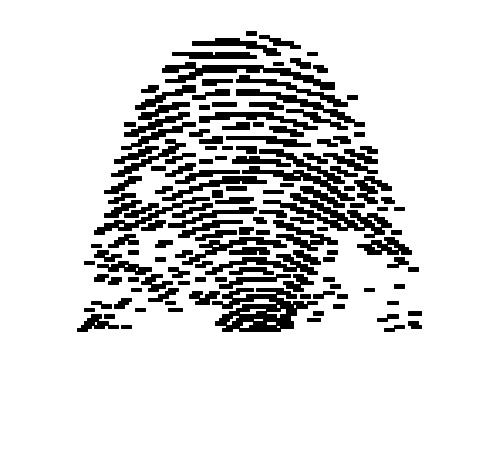

In [138]:
FPHero=erode(FPH)
FPHopen=dilate(FPHero)
FPHopen.show(inv=True)